### Google App Rating Project
* Objective: Make a model to predict the app rating, with other information about the app provided.

In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing dataset using pandas
google_df=pd.read_csv('googleplaystore.csv')

In [3]:
google_df.sample(10)  # printing random sample dataframe to understand

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9422,Tamago egg,GAME,3.0,49,7.1M,"5,000+",Free,0,Everyone,Trivia,"October 31, 2017",1.0.1,2.3.3 and up
8015,"FXNOW: Movies, Shows & Live TV",FAMILY,3.9,31552,Varies with device,"1,000,000+",Free,0,Teen,Entertainment,"July 23, 2018",Varies with device,4.4 and up
1147,Current debit card and app made for teens,FINANCE,4.3,685,21M,"50,000+",Free,0,Everyone,Finance,"August 3, 2018",3.0.22,4.4 and up
9370,EH National Mobile Banking,FINANCE,NaN,0,Varies with device,50+,Free,0,Everyone,Finance,"October 12, 2017",5.2.12,4.2 and up
2701,Rossmann PL,SHOPPING,4.0,15867,Varies with device,"5,000,000+",Free,0,Everyone,Shopping,"August 6, 2018",Varies with device,4.0.3 and up
10507,Rope Hero: Vice Town,GAME,4.4,452589,99M,"10,000,000+",Free,0,Mature 17+,Action,"July 1, 2018",2.2,4.0 and up
8052,CX_WiFiUFO,SPORTS,3.7,818,5.3M,"100,000+",Free,0,Everyone,Sports,"June 8, 2016",4.4_23,4.0 and up
3578,My baby Game (Balloon POP!),PARENTING,3.8,3614,3.3M,"1,000,000+",Free,0,Everyone,Parenting;Brain Games,"May 28, 2018",2.15.2714,4.0 and up
6136,BG BRIDAL GALLERY,LIFESTYLE,4.6,17,19M,"1,000+",Free,0,Everyone,Lifestyle,"June 27, 2018",2.1.1,4.4 and up
7612,"What's Up, Snoopy? - Peanuts",FAMILY,4.5,773,55M,"100,000+",Free,0,Everyone,Arcade;Action & Adventure,"August 22, 2017",1.0.1,5.1 and up


In [4]:
# checking data type of all column
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# cheking null values in each column of the dataframe
google_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

* We can see above here some column of dataframe is having nan value.

In [6]:
# dropping null values in rating column
google_df=google_df.dropna(subset=['Rating'])

In [7]:
# replacing M and mulitiplying 1000 in size column using lambda function
google_df['Size']=google_df['Size'].apply(lambda x: np.float(x.replace('M',''))*1000 if type(x) !=float and 'M' in x else x)

C:\Users\User\AppData\Local\Temp\ipykernel_12104\400353306.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  google_df['Size']=google_df['Size'].apply(lambda x: np.float(x.replace('M',''))*1000 if type(x) !=float and 'M' in x else x)


In [8]:
# removing k in size column using lambda function
google_df['Size']=google_df['Size'].apply(lambda x: np.float(x.replace('k','')) if type(x) !=float and 'k' in x else x)

C:\Users\User\AppData\Local\Temp\ipykernel_12104\2448196739.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  google_df['Size']=google_df['Size'].apply(lambda x: np.float(x.replace('k','')) if type(x) !=float and 'k' in x else x)


In [9]:
# converting Size column into integer datatype
google_df['Size'] = pd.to_numeric(google_df['Size'],errors = 'coerce')  # fill string by Nan
google_df['Size'].fillna('0',inplace=True)  # replacing Nan by zero using fillna method
google_df['Size']=google_df['Size'].astype(int)
#cheking datatype of Size column
google_df['Size'].dtype

dtype('int32')

In [10]:
# replacing M in reviews column and mulitplying 1000000 for million
google_df['Reviews']=google_df['Reviews'].apply(lambda x: np.float(x.replace('M',''))*1000000 if type(x) !=float and 'M' in x else x)

C:\Users\User\AppData\Local\Temp\ipykernel_12104\2971346366.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  google_df['Reviews']=google_df['Reviews'].apply(lambda x: np.float(x.replace('M',''))*1000000 if type(x) !=float and 'M' in x else x)


In [11]:
# Converting reviews column into float datatype
google_df['Reviews']=google_df['Reviews'].astype(float)

In [12]:
# checking data type of reviews column
google_df['Reviews'].dtype

dtype('float64')

In [13]:
# removing '+' and ',' from Installs column
google_df['Installs']=google_df['Installs'].str.replace(r'\D','',regex=True)

In [14]:
# converting installs column into integer datatype
google_df['Installs'] = pd.to_numeric(google_df['Installs'],errors = 'coerce')  # fill emtpy string by Nan
google_df['Installs'].fillna('0',inplace=True)  # replacing Nan by zero using fillna method
google_df['Installs']=google_df['Installs'].astype(int)
#cheking datatype of Installs column
google_df['Installs'].dtype

dtype('int32')

In [15]:
# removing '$' sign from Price column
google_df['Price']=google_df['Price'].str.replace(r'\D','',regex=True)

In [16]:
# converting Price column into integer datatype
google_df['Price'] = pd.to_numeric(google_df['Price'],errors = 'coerce')  # fill emtpy string by Nan
google_df['Price'].fillna('0',inplace=True)  # replacing Nan by zero using fillna method
google_df['Price']=google_df['Price'].astype(int)
#cheking datatype of Price column
google_df['Price'].dtype

dtype('int32')

#### Sanity Check

In [17]:
# here removing all rating which is greater than 5 and less then 1
google_df[(google_df['Rating']>0) & (google_df['Rating']<=5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
# droping such row which is having higher review than installs
google_df[google_df['Reviews']<=google_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [19]:
# Dropping such row which is having price greater than zero in free types
google_df[(google_df['Type']=='Free') & (google_df['Price']==0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Performing Univariate Analysis

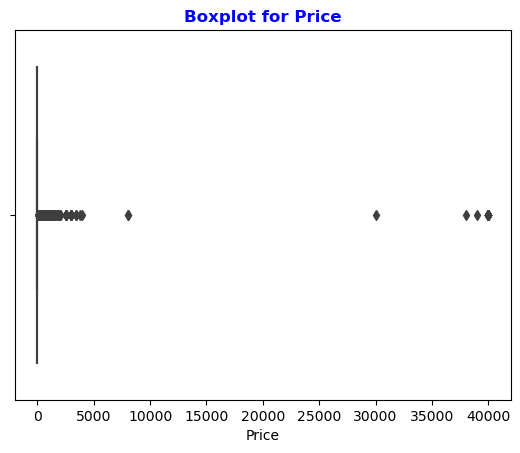

In [20]:
# boxplot using seaborn
sns.boxplot(data=google_df,x='Price')
plt.title('Boxplot for Price',weight='bold',color='blue')
plt.show()

* Boxplot for Price: Here we can see there seems some outliers which means price of some apps are more than usual.

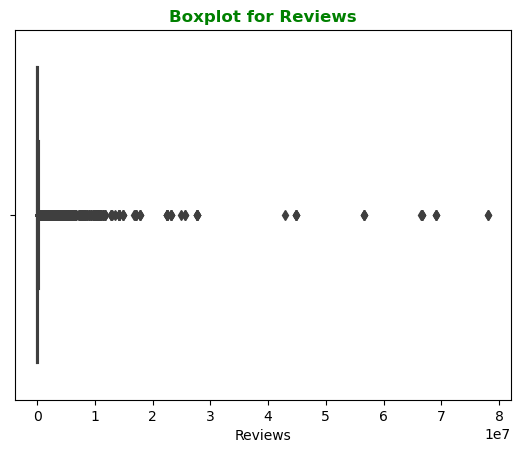

In [21]:
# boxplot using seaborn for Reviews
sns.boxplot(data=google_df,x='Reviews')
plt.title('Boxplot for Reviews',weight='bold',color='green')
plt.show()

* Boxplot for Reviews: Here we can see in boxplot there is outlier present, means some review is very higher number.

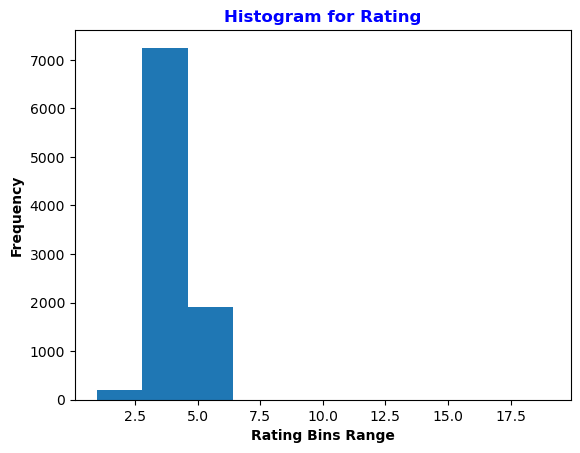

In [22]:
# histogram for rating using matplotlib
plt.hist(google_df['Rating'])
plt.title('Histogram for Rating',weight='bold',color='blue')
plt.xlabel('Rating Bins Range',weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.show()

* Histogram for Rating: Here we can see some rating is distributed higher than 5.Mostly ratings are withing 2.5 to 5.
* Here in above plots we observed that Price,Review and Rating all are having outlier and seems incorrect.

#### Outliers treatment

In [23]:
# checking record of price which is having price greater than 200
google_df[google_df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800,100000,Paid,499,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000,100000,Paid,499,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800,100000,Paid,499,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000,100000,Paid,499,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,0,100000,Paid,399,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10583,Florida Tides & Weather,WEATHER,3.8,30.0,2000,1000,Paid,699,Everyone,Weather,"May 6, 2015",2.0.0,2.3 and up
10645,Football Manager Mobile 2018,SPORTS,3.9,11460.0,0,100000,Paid,899,Everyone,Sports,"June 27, 2018",Varies with device,4.1 and up
10679,Solitaire+,GAME,4.6,11235.0,0,100000,Paid,299,Everyone,Card,"July 30, 2018",Varies with device,Varies with device
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2400,1000,Paid,799,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up


* Seems some apps are junk apps because it is having price greater than 200

In [24]:
# droping junk app records from price column which is having price more than 200
google_df.drop(google_df[google_df['Price']>200].index, inplace=True)
google_df  # priting dataframe after droping

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
# checking record which is having review more than 2 million
google_df[google_df['Reviews']>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,0,100000000,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,0,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098.0,0,100000000,Free,0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646.0,71000,100000000,Free,0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25000,10000000,Free,0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10327,Garena Free Fire,GAME,4.5,5534114.0,53000,100000000,Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up


In [26]:
# droping record which is having reviews more than 2 million
google_df.drop(google_df[google_df['Reviews']>2000000].index,inplace=True)
google_df # printing dataframe after droping 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [27]:
# finding different percentile of Install using numpy
np.percentile(google_df['Installs'],10)
Q1=np.percentile(google_df['Installs'],25)  # 25th percentile(Q1)
np.percentile(google_df['Installs'],50)
np.percentile(google_df['Installs'],70)
np.percentile(google_df['Installs'],90)
np.percentile(google_df['Installs'],95)
np.percentile(google_df['Installs'],99)

100000000.0

In [28]:
# for deciding thresold as cuttoff for outlier we will calculate 75th percentile too
Q3=np.percentile(google_df['Installs'],75)

In [29]:
IQR=Q3-Q1  # finding interquartile range
LB=Q1-(1.5*IQR)  # finding lower bracket
UB=Q3+(1.5*IQR) # finding upper bracket
print('LB=',LB)
print('UB=',UB)

LB= -7475000.0
UB= 12485000.0


* Here we can decide threshold i.e installs over Upper bracket is outlier of installs.

In [30]:
# now droping record of installs which is more than UB 
google_df.drop(google_df[google_df['Installs']>UB].index,inplace=True)
google_df  # printing dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Bivariate Analysis

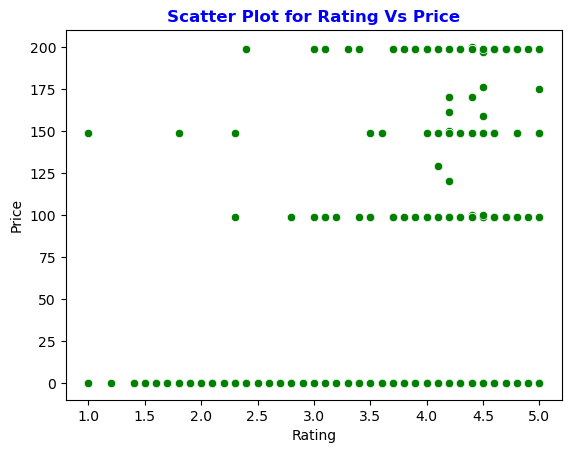

In [31]:
# scatterplot Rating vs Price
sns.scatterplot(data=google_df,x='Rating',y='Price',color='green')
plt.title('Scatter Plot for Rating Vs Price',weight='bold',color='blue')
plt.show()

* As we can see in scatterplot rating is increased with price,price is having 200 customer rated 5 star.

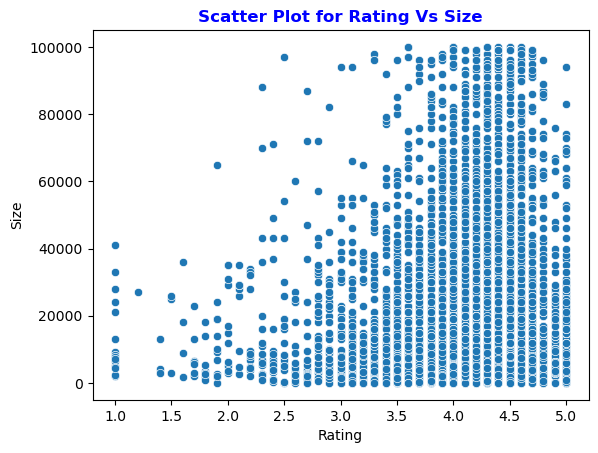

In [32]:
# scatterplot Rating vs Size
sns.scatterplot(data=google_df,x='Rating',y='Size')
plt.title('Scatter Plot for Rating Vs Size',weight='bold',color='blue')
plt.show()

* Yes heavier size apps rated better.We can see in scatterplot as size is increased then rating is also incresed.

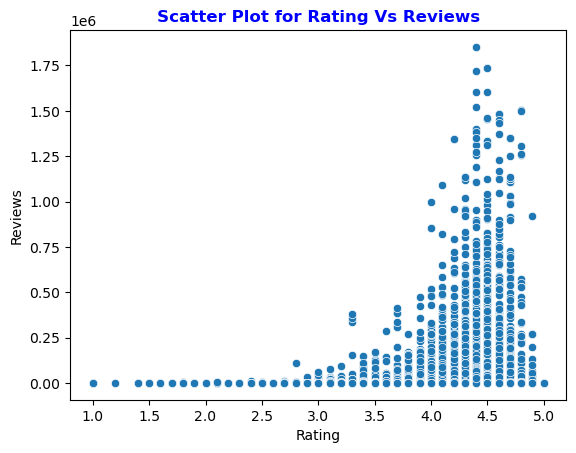

In [33]:
# scatterplot Rating vs Reviews
sns.scatterplot(data=google_df,x='Rating',y='Reviews')
plt.title('Scatter Plot for Rating Vs Reviews',weight='bold',color='blue')
plt.show()

* Here rating and reviews are showing positive relationship between them. Definetly we can say see here more review got more     rating indeed.

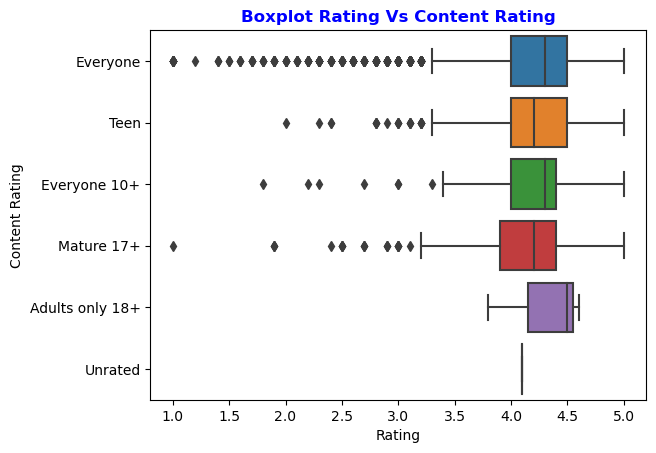

In [34]:
# boxplot rating vs content rating
sns.boxplot(data=google_df,x='Rating',y='Content Rating')
plt.title('Boxplot Rating Vs Content Rating',weight='bold',color='blue')
plt.show()

* The rating which is done by everyone is  having more outliers and other also.But The rating which is done by Adults only 18+   is good rated and liked.

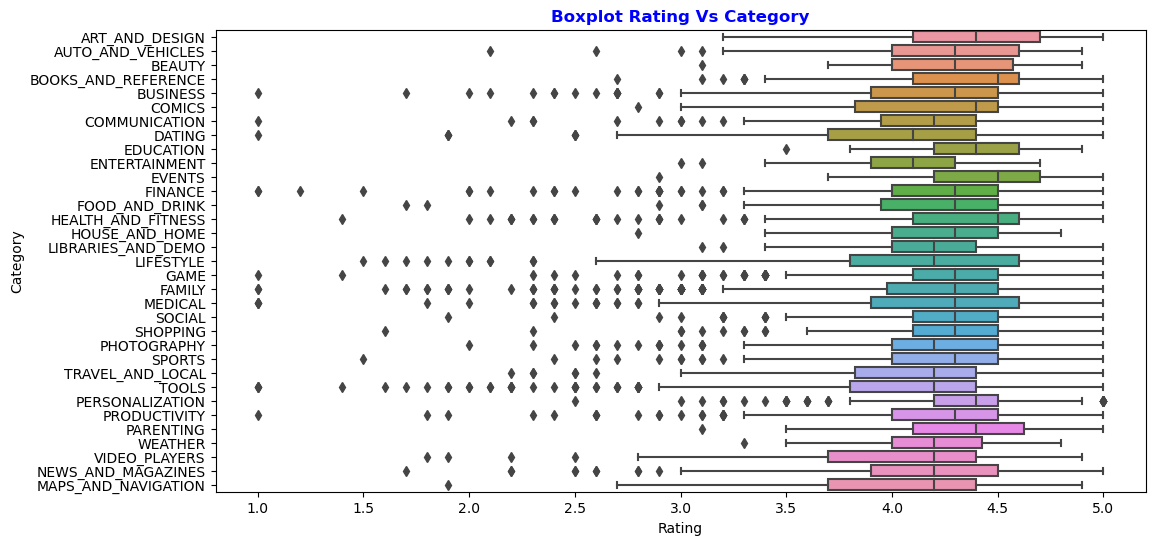

In [35]:
# boxplot rating vs category
plt.figure(figsize=(12,6))
sns.boxplot(data=google_df,x='Rating',y='Category')
plt.title('Boxplot Rating Vs Category',weight='bold',color='blue')
plt.show()

* Category Art and Design has the best ratings,because this category is not having any outliers.

* For the above plots we observed that paid apps,havier in size and more review having good rating but only adult 18+ only       rated correctly and category art and design apps is most liked and rated best.

#### Data Preprocessing

In [36]:
# copying full dataframe
inp1=google_df.copy()
inp1.head(10) # printing dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19000,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29000,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33000,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3100,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880.0,28000,1000000,Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


In [37]:
# applying log tranformation in Reviews column to reduce the skewness of data
inp1['Review_Skewed']=np.log(inp1['Reviews']) # making new column Review_Skewed

In [38]:
# applying log tranformation in Installs column to reduce skewness of data
inp1['Installs_Skewed']=np.log(inp1['Installs']) # making new column Install_Skewed

In [39]:
# droping column from inp1 which are not useful 
inp1.drop(columns=['App','Last Updated','Current Ver','Android Ver','Reviews','Installs','Type','Size'],inplace=True)


In [40]:
inp1.head(10) # printing dataframe after droping unuseful column

,Category,Rating,Price,Content Rating,Genres,Review_Skewed,Installs_Skewed
0,ART_AND_DESIGN,4.1,0,Everyone,Art & Design,5.068904,9.210340
1,ART_AND_DESIGN,3.9,0,Everyone,Art & Design;Pretend Play,6.874198,13.122363
2,ART_AND_DESIGN,4.7,0,Everyone,Art & Design,11.379508,15.424948
4,ART_AND_DESIGN,4.3,0,Everyone,Art & Design;Creativity,6.874198,11.512925
5,ART_AND_DESIGN,4.4,0,Everyone,Art & Design,5.117994,10.819778
6,ART_AND_DESIGN,3.8,0,Everyone,Art & Design,5.181784,10.819778
7,ART_AND_DESIGN,4.1,0,Everyone,Art & Design,10.513661,13.815511
8,ART_AND_DESIGN,4.4,0,Everyone,Art & Design,9.531771,13.815511
9,ART_AND_DESIGN,4.7,0,Everyone,Art & Design;Creativity,4.795791,9.210340
10,ART_AND_DESIGN,4.4,0,Everyone,Art & Design,9.538204,13.815511


In [41]:
# converting categorical column into numerical using one hot encoding 
inp2=pd.get_dummies(inp1,columns=['Category','Genres','Content Rating']) # these variable have more than two category
inp2.head(10) # priting dataframe

,Rating,Price,Review_Skewed,Installs_Skewed,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,0,5.068904,9.210340,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,0,6.874198,13.122363,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,0,11.379508,15.424948,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,0,6.874198,11.512925,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,0,5.117994,10.819778,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,0,5.181784,10.819778,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,4.1,0,10.513661,13.815511,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,4.4,0,9.531771,13.815511,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,4.7,0,4.795791,9.210340,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,4.4,0,9.538204,13.815511,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
# Finally checking is any nan value
inp2.isna().sum()

Rating                         0
Price                          0
Review_Skewed                  0
Installs_Skewed                0
Category_ART_AND_DESIGN        0
                              ..
Content Rating_Everyone        0
Content Rating_Everyone 10+    0
Content Rating_Mature 17+      0
Content Rating_Teen            0
Content Rating_Unrated         0
Length: 157, dtype: int64

#### Feature Engineering

In [43]:
# splitting dataset into feature and target
df_train=inp2.drop(columns=['Rating'])
# df_train is features and independent variable(input)

In [44]:
df_test=inp2[['Rating']]  # Rating is our target variable and it is dependent

#### Spliting dataset into training and testing

In [45]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df_train,df_test,test_size=0.30)

In [46]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape) 

(5662, 156)
(2427, 156)
(5662, 1)
(2427, 1)


In [47]:
# Here my target variable is in numerical form so here will be regression problem
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [48]:
Lr.fit(train_x,train_y)

LinearRegression()

In [49]:
# now pridicting with the help of linear regression model
predicted=Lr.predict(test_x)

In [50]:
predicted  # it gives array predicted value

array([[4.2318126 ],
       [4.39299953],
       [4.10305321],
       ...,
       [4.32656491],
       [4.35274923],
       [4.21283925]])

In [51]:
# making dataframe of predicted 
predicted=pd.DataFrame(predicted)

#### Checking accuracy of model Using r2 or R squared

In [52]:
#now accuracy testing of my model with predicted value and actual value
from sklearn import metrics

In [53]:
metrics.r2_score(predicted,test_y)

-0.0022978626149876558